In [ ]:
!pip install tensorflow==1.15.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -q lucid>=0.2.3
!pip install -q moviepy

In [ ]:
!pip install imageio==2.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import json
import moviepy.editor as mvp
from google.colab import files
import tensorflow.compat.v1.gfile as gfile
import lucid.misc.io.showing as show

In [ ]:
from lucid.misc.gl.glcontext import create_opengl_context

# Now it's safe to import OpenGL and EGL functions
import OpenGL.GL as gl
from OpenGL.GLU import *

# create_opengl_context() creates GL context that is attached to an
# offscreen surface of specified size. Note that rendering to buffers
# of different size and format is still possible with OpenGL Framebuffers.
#
# Users are expected to directly use EGL calls in case more advanced
# context management is required.
WIDTH, HEIGHT = 800,600
create_opengl_context((WIDTH, HEIGHT))
    
# OpenGL context is available here.

print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR)) 
#print(gl.glGetString(gl.GL_EXTENSIONS))

b'4.6.0 NVIDIA 460.32.03'
b'NVIDIA Corporation'


In [ ]:
# Let's render something!
def midpointcircleHW(r, c1,c2):
  d=1-r
  x=0
  y=r
  circlePointsHM(x+c1,y+c2)
  while (x<y):
    if d<0:
      d=d+2*x+3
      x=x+1
    else:
      d=d+2*x-2*y+5
      x=x+1
      y=y-1
    circlePointsHM(x+c1,y+c2)

In [ ]:
def circlePointsHM(x,y):
  gl.glPointSize(5)
  gl.glColor3f(0,255,255)
  x=x/100
  y=y/100


  gl.glBegin(gl.GL_POINTS)
  gl.glVertex2f(x,y)
  gl.glVertex2f(y,x)
  gl.glVertex2f(y,-x)
  gl.glVertex2f(x,-y)
  gl.glVertex2f(-x,-y)
  gl.glVertex2f(-y,-x)
  gl.glVertex2f(-y,x)
  gl.glVertex2f(-x,y)
  gl.glEnd()

In [ ]:
gl.glClear(gl.GL_COLOR_BUFFER_BIT)
gl.glPointSize(5)
gl.glColor3d(0,255,255)

def draw_points(x, y):
    gl.glPointSize(5)
    gl.glBegin(gl.GL_POINTS)
    gl.glColor3f(0, 179, 0)
    gl.glVertex2f(x, y)
    gl.glEnd()

def FindZone(x1, y1, x2, y2):
    dx = (x2-x1)
    dy =(y2-y1)
    zone = None
    if (abs(dx) >= abs(dy)):
        if (dx >= 0 and dy >= 0):
            zone = 0
        if (dx < 0 and dy >= 0):
            zone = 3
        if (dx < 0 and dy < 0):
            zone = 4
        if (dx >= 0 and dy < 0):
            zone = 7

    elif (abs(dy) > abs(dx)):
        if (dx >= 0 and dy >= 0):
            zone = 1
        if (dx < 0 and dy >= 0):
            zone = 2
        if (dx < 0 and dy < 0):
            zone = 5
        if (dx >= 0 and dy < 0):
            zone = 6
    return zone

def convertZone0(x1, y1, zone):
    if zone == 0:
        pass
    elif zone == 3:
        x1,y1 = -x1,y1
    elif zone == 4:
        x1,y1 = -x1,-y1
    elif zone == 7:
        x1,y1 = x1,-y1
    elif zone == 1:
        x1,y1 = y1,x1
    elif zone == 2:
        x1,y1 = y1,-x1
    elif zone == 5:
        x1,y1 = -y1,-x1
    elif zone == 6:
        x1,y1 = -y1,x1

    return x1, y1


def org_zone(x1, y1, zone):
    if zone == 0:
        pass
    elif zone == 3:
        x1,y1 = -x1,y1
    elif zone == 4:
        x1,y1 = -x1,-y1
    elif zone == 7:
        x1,y1 = x1,-y1
    elif zone == 1:
        x1,y1 = y1,x1
    elif zone == 2:
        x1,y1 = -y1,x1
    elif zone == 5:
        x1,y1 = -y1,-x1
    elif zone == 6:
        x1,y1 = y1,-x1

    return x1, y1


def midPoint(x1, y1, x2, y2):
    zone = FindZone(x1, y1, x2, y2)

    draw_points(x1, y1)

    x1, y1 = convertZone0(x1, y1, zone)
    x2, y2 = convertZone0(x2, y2, zone)
    dx = x2 - x1
    dy = y2 - y1
    d = dy - (dx / 2)
    x = x1
    y = y1

    while (x < x2):
        x = x + .01
        if (d < 0):
            d = d + dy
        else:
            d = d + (dy - dx)
            y = y + .01
        x_new, y_new = org_zone(x, y, zone)
        draw_points(x_new, y_new)

In [ ]:
def digit_square(length, width, x_val, y_val):

    midPoint(x_val,y_val, x_val, y_val + length)
    midPoint(x_val, y_val + length, x_val + width, y_val + length)
    midPoint(x_val + width, y_val + length, x_val + width, y_val)
    midPoint(x_val, y_val, x_val+length, y_val)

In [ ]:
n = int(input("Enter Your Value: "))

Enter Your Value: 6


In [ ]:
x = 20
a = 1
while(a<6):
  midpointcircleHW(x,0,0)
  digit_square((x/100)*2,(x/100)*2,-(x/100),-(x/100))
  a = a+1
  x = x*2


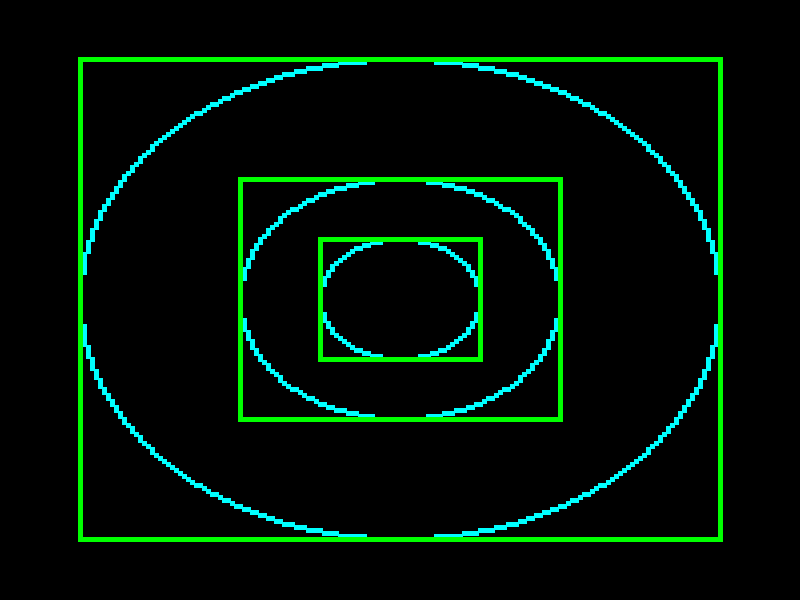

In [ ]:
img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf, np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
show.image(img/255.0)